In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
gold_data=pd.read_csv('gld_price_data.csv')

In [3]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [4]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
gold_data.shape

(2290, 6)

In [7]:
#info about the dataset
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
#checking numm values

gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
#statistical measures
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [10]:
correlation= gold_data.select_dtypes(include='number').corr()

<Axes: >

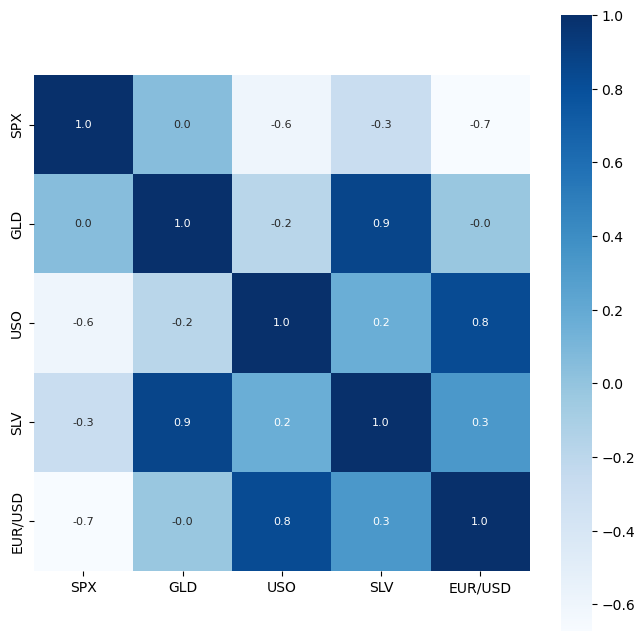

In [11]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [12]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\pbhar\AppData\Local\Temp\ipykernel_11616\2115273610.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

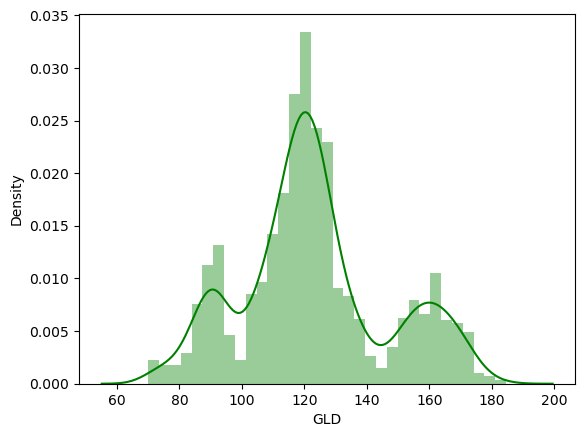

In [13]:
#distributon plot of gold
sns.distplot(gold_data['GLD'],color='green')

Splitting the features and Target
=

In [14]:
X=gold_data.drop(['Date','GLD'],axis=1)
Y=gold_data['GLD']


In [15]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [16]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting Training Data and Testing Data
=

In [17]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

Model Training:RandomForest Regressor
=

In [18]:
regressor=RandomForestRegressor(n_estimators=100)

In [19]:
#training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [20]:
#prediction on test data
test_data_prediction=regressor.predict(X_test)

In [21]:
print(test_data_prediction)

[168.58479921  81.93119964 116.20240026 127.61270042 120.76220131
 154.55879744 150.25049905 125.94540034 117.45809865 125.88540091
 116.75650097 170.53980022 141.26179861 168.02179866 115.1734
 117.48710065 141.96970276 170.52800135 158.99850299 162.97449942
 155.23470057 125.3843999  175.22509959 157.06300328 125.15570033
  93.91850018  77.94959981 120.68460008 119.21829982 167.57259976
  88.14680063 125.16829991  91.36040089 117.72930038 121.0936991
 136.40340074 115.34600118 115.07370092 148.61430007 107.49470084
 103.98080236  87.10229778 126.44050062 117.92390029 152.59169924
 119.70150004 108.56810005 108.21429855  93.26310036 127.24449721
  74.75730036 113.73969917 121.19130024 111.27169906 118.95799914
 121.34089857 159.58529928 167.85350114 146.97629682  85.92669906
  94.39900051  86.72009901  90.57849982 119.10620029 126.46460074
 127.61289993 170.38530009 122.21899919 117.41129912  98.22449994
 168.2992017  143.30809883 132.17020254 121.29070253 121.47809929
 119.64770069 1

In [22]:
# Rsquaresd matrix
error_score=metrics.r2_score(Y_test,test_data_prediction)
print(f"R squared error: {error_score}")

R squared error: 0.9894475961478455


Comparing Actual values and predicted values in a plot
=

In [23]:
Y_test=list(Y_test)

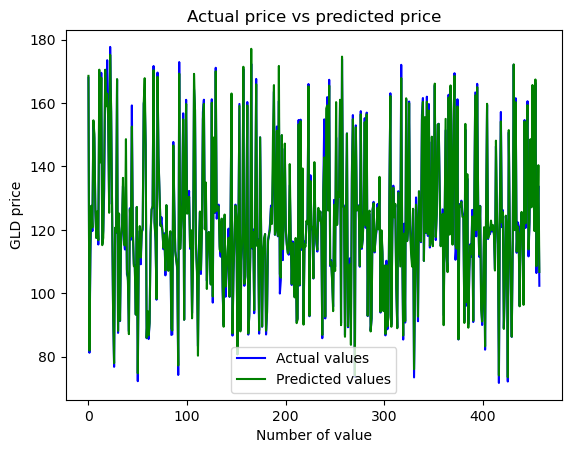

In [24]:
plt.plot(Y_test,color='blue',label='Actual values')
plt.plot(test_data_prediction,color='green',label='Predicted values')
plt.title("Actual price vs predicted price")
plt.xlabel("Number of value")
plt.ylabel('GLD price')
plt.legend()
plt.show()

In [25]:
def predict(x,w,b):
    p=(np.dot(x,w)+b)
    return p

In [26]:
def compute_cost(x,y,w,b):
    m=x.shape[0]
    cost=0
    for i in range(m):
        #f_wb_i=w[i]*x[i]+b
        f_wb_i=np.dot(x.iloc[i],w)+b
        cost_sum=(f_wb_i-y.iloc[i])**2
        cost+=cost_sum
    total_cost=cost/(2*m)
    return total_cost

In [27]:
def compute_gradient(x,y,w,b):
    m,n=x.shape
    dj_dw=np.zeros((n,))
    dj_db=0.0
    for i in range(m):
        err=(np.dot(x.iloc[i],w)+b)-y.iloc[i]
        for j in range(n):
            dj_dw[j]=dj_dw[j]+err*x.iloc[i,j]
        dj_db=dj_db+err
    dj_dw/=m
    dj_db/=m
    return dj_db,dj_dw

In [28]:
def gradient_descent(x,y,w_in,b_in,cost_function,gradient_function,alpha,num_iters):
    w=w_in
    b=b_in
    j_history=[]
    
    for i in range(num_iters):
        dj_db,dj_dw=gradient_function(x,y,w,b)
        
        w-=alpha*dj_dw
        b-=alpha*dj_db
        if i<100000:
            j_history.append(cost_function(x,y,w,b))
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {j_history[-1]:8.2f}   ")
    return w,b,j_history

In [ ]:
alpha=1e-2
num_iters=10000
n=X.shape[1]
w_init=np.zeros(n)
b=0
X_train=(X_train-X_train.mean())/X_train.std()
X_test=(X_test-X_test.mean())/X_test.std()

w_final,b_final,j_hist=gradient_descent(X_train,Y_train,w_init,b,compute_cost,compute_gradient,alpha,num_iters)
print(f"w_final :{w_final} b_final:{b_final}")


Iteration    0: Cost  7659.43   
Iteration 1000: Cost    31.35   


In [ ]:
y_pred=predict(X_test,w_final,b_final)

Evalutation of model
=

In [ ]:
def mean_squared_error(Y_test,y_pred):
    return np.mean((Y_test-y_pred)**2)
print(hello)